In [ ]:
from pandas import read_csv, unique

import numpy as np

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from keras.layers import Conv1D, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import os
import numpy as np
from scipy import stats
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.models import  model_from_json
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import warnings
warnings.filterwarnings('ignore')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns


from sklearn.model_selection import train_test_split

# Load the dataset into a Pandas DataFrame
data = pd.read_table("/content/drive/MyDrive/wisdm_har.txt",sep=" ",names=["user","activity","timestamp","x-acceleration","y-acceleration","z-acceleration"])
# data.columns
data.head(20)


,user,activity,timestamp,x-acceleration,y-acceleration,z-acceleration
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164
5,33,Jogging,49106442306000,1.375655,-2.492524,-6.510526
6,33,Jogging,49106542312000,-0.612916,10.569390,5.706926
7,33,Jogging,49106652389000,-0.503953,13.947236,7.055340
8,33,Jogging,49106762313000,-8.430995,11.413852,5.134871
9,33,Jogging,49106872299000,0.953424,1.375655,1.648062


In [ ]:
# data=data.fillna(0)
data = data.dropna()
print(data)
# data=pd.DataFrame(data)


         user activity        timestamp  x-acceleration  y-acceleration  \
0          33  Jogging   49105962326000       -0.694638       12.680544   
1          33  Jogging   49106062271000        5.012288       11.264028   
2          33  Jogging   49106112167000        4.903325       10.882658   
3          33  Jogging   49106222305000       -0.612916       18.496431   
4          33  Jogging   49106332290000       -1.184970       12.108489   
...       ...      ...              ...             ...             ...   
1098204    19  Sitting  131623331483000        9.000000       -1.570000   
1098205    19  Sitting  131623371431000        9.040000       -1.460000   
1098206    19  Sitting  131623411592000        9.080000       -1.380000   
1098207    19  Sitting  131623491487000        9.000000       -1.460000   
1098208    19  Sitting  131623531465000        8.880000       -1.330000   

         z-acceleration  
0              0.503953  
1              0.953424  
2             -0.0817

In [ ]:
data['magnitude'] = (data['x-acceleration']**2 + data['y-acceleration']**2 + data['z-acceleration']**2)**0.5
print(data.head(20))

    user activity       timestamp  x-acceleration  y-acceleration  \
0     33  Jogging  49105962326000       -0.694638       12.680544   
1     33  Jogging  49106062271000        5.012288       11.264028   
2     33  Jogging  49106112167000        4.903325       10.882658   
3     33  Jogging  49106222305000       -0.612916       18.496431   
4     33  Jogging  49106332290000       -1.184970       12.108489   
5     33  Jogging  49106442306000        1.375655       -2.492524   
6     33  Jogging  49106542312000       -0.612916       10.569390   
7     33  Jogging  49106652389000       -0.503953       13.947236   
8     33  Jogging  49106762313000       -8.430995       11.413852   
9     33  Jogging  49106872299000        0.953424        1.375655   
10    33  Jogging  49106982315000       -8.199450       19.572440   
11    33  Jogging  49107092330000        1.416516        5.788648   
12    33  Jogging  49107202316000       -1.879608       -2.982856   
13    33  Jogging  49107312332000 

In [ ]:
data['x-acceleration']=data['x-acceleration'].astype('float')
data['y-acceleration']=data['y-acceleration'].astype('float')
data['z-acceleration']=data['z-acceleration'].astype('float')
data['magnitude']=data['magnitude'].astype('float')


In [ ]:
Walking=data[data['activity']=='Walking'].copy()
Jogging=data[data['activity']=='Jogging'].copy()
Upstairs=data[data['activity']=='Upstairs'].copy()
Downstairs=data[data['activity']=='Downstairs'].copy()
Sitting=data[data['activity']=='Sitting'].copy()
Standing=data[data['activity']=='Standing'].copy()


In [ ]:
label_encode = LabelEncoder()
data['activityEncode'] = label_encode.fit_transform(data['activity'].values.ravel())
data

,user,activity,timestamp,x-acceleration,y-acceleration,z-acceleration,magnitude,activityEncode
0,33,Jogging,49105962326000,-0.694638,12.680544,0.503953,12.709551,1
1,33,Jogging,49106062271000,5.012288,11.264028,0.953424,12.365693,1
2,33,Jogging,49106112167000,4.903325,10.882658,-0.081722,11.936562,1
3,33,Jogging,49106222305000,-0.612916,18.496431,3.023717,18.751973,1
4,33,Jogging,49106332290000,-1.184970,12.108489,7.205164,14.139804,1
...,...,...,...,...,...,...,...,...
1098204,19,Sitting,131623331483000,9.000000,-1.570000,1.690000,9.290910,2
1098205,19,Sitting,131623371431000,9.040000,-1.460000,1.730000,9.319125,2
1098206,19,Sitting,131623411592000,9.080000,-1.380000,1.690000,9.338463,2
1098207,19,Sitting,131623491487000,9.000000,-1.460000,1.730000,9.280329,2


In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.model_selection import train_test_split

# # Assuming 'activity' is your target variable column
# X = data.drop('activityEncode', axis=1)
# y = data['activityEncode']

# # Apply oversampling to the training data only
# oversampler = RandomOverSampler(random_state=42)
# X,y = oversampler.fit_resample(X, y)

In [ ]:
# Features (sensor readings)
X = data[['x-acceleration', 'y-acceleration', 'z-acceleration','magnitude']]

# Target (activity labels)
y = data['activityEncode']
X.shape,y.shape

((1098208, 4), (1098208,))

In [ ]:
X['x-acceleration'] = (X['x-acceleration']-X['x-acceleration'].min())/(X['x-acceleration'].max()-X['x-acceleration'].min())
X['y-acceleration'] = (X['y-acceleration']-X['y-acceleration'].min())/(X['y-acceleration'].max()-X['y-acceleration'].min())
X['z-acceleration'] = (X['z-acceleration']-X['z-acceleration'].min())/(X['z-acceleration'].max()-X['z-acceleration'].min())
X['magnitude'] = (X['magnitude']-X['magnitude'].min())/(X['magnitude'].max()-X['magnitude'].min())
X.head()

,x-acceleration,y-acceleration,z-acceleration,magnitude
0,0.478144,0.814390,0.515198,0.380777
1,0.622404,0.778664,0.526603,0.370475
2,0.619649,0.769046,0.500337,0.357618
3,0.480209,0.961070,0.579135,0.561807
4,0.465749,0.799962,0.685236,0.423627


In [ ]:
data = pd.concat([X, y], axis=1)
print(data,data.shape)

         x-acceleration  y-acceleration  z-acceleration  magnitude  \
0              0.478144        0.814390        0.515198   0.380777   
1              0.622404        0.778664        0.526603   0.370475   
2              0.619649        0.769046        0.500337   0.357618   
3              0.480209        0.961070        0.579135   0.561807   
4              0.465749        0.799962        0.685236   0.423627   
...                 ...             ...             ...        ...   
1098204        0.723205        0.454981        0.545293   0.278354   
1098205        0.724216        0.457755        0.546308   0.279200   
1098206        0.725228        0.459773        0.545293   0.279779   
1098207        0.723205        0.457755        0.546308   0.278037   
1098208        0.720172        0.461034        0.543263   0.273301   

         activityEncode  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
...

In [ ]:
from scipy.stats import stats
def get_segments(dataframe, step,segment_size):

    segments = []
    labels = []
    n_features=4

    for i in range(0,  len(dataframe)- segment_size, step):

        xs = dataframe['x-acceleration'].values[i: i + segment_size]
        ys = dataframe['y-acceleration'].values[i: i + segment_size]
        zs = dataframe['z-acceleration'].values[i: i + segment_size]
        mags = dataframe['magnitude'].values[i: i + segment_size]

        # dataframe['activityEncode'] = dataframe['activityEncode'].astype('str')
        label = np.max(dataframe['activityEncode'].values[i: i + segment_size])
        segments.append([xs, ys, zs, mags])
        labels.append(label)

    reshaped_segments = np.asarray(segments).reshape(-1,segment_size,n_features)
    labels = np.asarray(labels)

    return reshaped_segments , np.array(labels)

In [ ]:
X,y=get_segments(data,40,80)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming data is your combined feature and label data
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
# print("Training set: train_data.shape =", train_data.shape)
# print("Test set: test_data.shape =", test_data.shape)

In [ ]:
print(X_train.shape,X_test.shape)

(21963, 80, 4) (5491, 80, 4)


In [ ]:
X_train_1d=X_train
X_test_1d=X_test

In [ ]:
X_train=X_train.reshape(21963,80,4,1)
X_test=X_test.reshape(5491,80,4,1)

print(X_train.shape,X_test.shape)

(21963, 80, 4, 1) (5491, 80, 4, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense

model = Sequential()
model.add(Conv2D(16, (2, 2), input_shape=(80,4,1), activation='relu'))
# model.add(MaxPooling2D((1, 2), name="max_pooling2d_1"))

model.add(Dropout(0.1))

model.add(Conv2D(32, (2, 2), activation='relu'))
# model.add(MaxPooling2D((1, 2), name="max_pooling2d_2"))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 79, 3, 16)         80        
                                                                 
 dropout (Dropout)           (None, 79, 3, 16)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 2, 32)         2080      
                                                                 
 dropout_1 (Dropout)         (None, 78, 2, 32)         0         
                                                                 
 flatten (Flatten)           (None, 4992)              0         
                                                                 
 dense (Dense)               (None, 64)                319552    
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,batch_size=50, epochs=20, validation_data=(X_test,y_test), verbose=1)

Epoch 1/20
440/440 [==============================] - 7s 14ms/step - loss: 0.7864 - accuracy: 0.7243 - val_loss: 0.6069 - val_accuracy: 0.7867
Epoch 2/20
440/440 [==============================] - 5s 12ms/step - loss: 0.5843 - accuracy: 0.7943 - val_loss: 0.5807 - val_accuracy: 0.7893
Epoch 3/20
440/440 [==============================] - 6s 14ms/step - loss: 0.5325 - accuracy: 0.8090 - val_loss: 0.4770 - val_accuracy: 0.8246
Epoch 4/20
440/440 [==============================] - 5s 12ms/step - loss: 0.4866 - accuracy: 0.8239 - val_loss: 0.4306 - val_accuracy: 0.8405
Epoch 5/20
440/440 [==============================] - 6s 14ms/step - loss: 0.4367 - accuracy: 0.8375 - val_loss: 0.3770 - val_accuracy: 0.8587
Epoch 6/20
440/440 [==============================] - 5s 12ms/step - loss: 0.3915 - accuracy: 0.8562 - val_loss: 0.3331 - val_accuracy: 0.8765
Epoch 7/20
440/440 [==============================] - 6s 14ms/step - loss: 0.3527 - accuracy: 0.8704 - val_loss: 0.3139 - val_accuracy: 0.8869

In [ ]:
def plot_learningCurve(history,epochs):
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

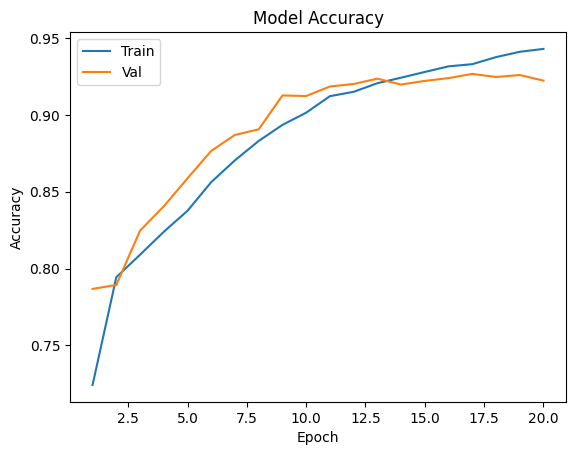

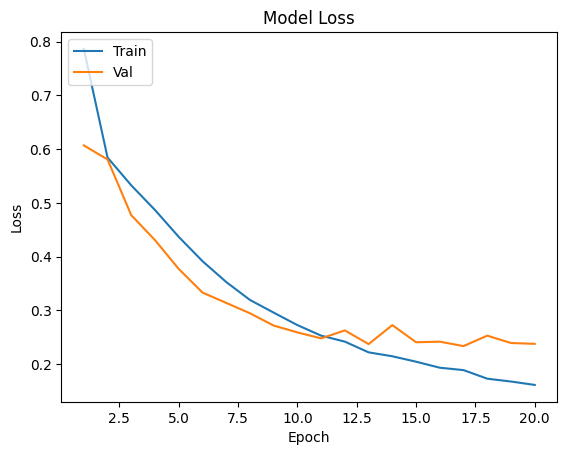

In [ ]:
plot_learningCurve(history,20)

In [ ]:
%pip install mlxtend --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

172/172 [==============================] - 0s 2ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

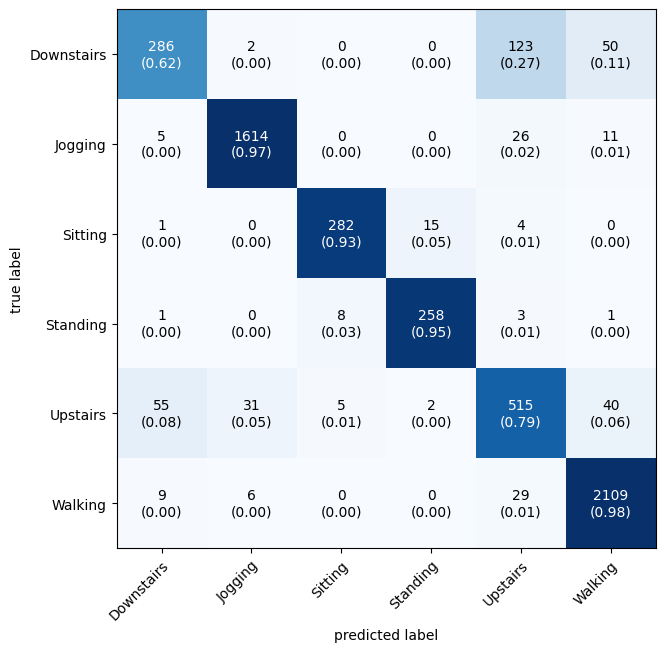

In [ ]:
mat=confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label_encode.classes_, show_normed=True, figsize=(7,7))

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.62      0.70       461
           1       0.98      0.97      0.98      1656
           2       0.96      0.93      0.94       302
           3       0.94      0.95      0.95       271
           4       0.74      0.79      0.76       648
           5       0.95      0.98      0.97      2153

    accuracy                           0.92      5491
   macro avg       0.89      0.88      0.88      5491
weighted avg       0.92      0.92      0.92      5491



In [ ]:
print(X_train_1d.shape,X_test_1d.shape)

(21963, 80, 4) (5491, 80, 4)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D, Dense

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(80,4)))
model.add(MaxPool1D(pool_size=2))
# model.add(MaxPooling2D((1, 2), name="max_pooling2d_1"))

model.add(Dropout(0.1))

model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
# model.add(MaxPooling2D((1, 2), name="max_pooling2d_2"))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 79, 64)            576       
                                                                 
 max_pooling1d (MaxPooling1  (None, 39, 64)            0         
 D)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 39, 64)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 38, 128)           16512     
                                                                 
 dropout_4 (Dropout)         (None, 38, 128)           0         
                                                                 
 flatten_1 (Flatten)         (None, 4864)              0         
                                                      

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_1d, y_train,batch_size=50, epochs=20, validation_data=(X_test_1d,y_test), verbose=1)

Epoch 1/20
440/440 [==============================] - 8s 16ms/step - loss: 0.7484 - accuracy: 0.7304 - val_loss: 0.5478 - val_accuracy: 0.8039
Epoch 2/20
440/440 [==============================] - 6s 14ms/step - loss: 0.5268 - accuracy: 0.8118 - val_loss: 0.4233 - val_accuracy: 0.8481
Epoch 3/20
440/440 [==============================] - 7s 15ms/step - loss: 0.4235 - accuracy: 0.8493 - val_loss: 0.3382 - val_accuracy: 0.8793
Epoch 4/20
440/440 [==============================] - 6s 14ms/step - loss: 0.3618 - accuracy: 0.8702 - val_loss: 0.3182 - val_accuracy: 0.8864
Epoch 5/20
440/440 [==============================] - 7s 15ms/step - loss: 0.3183 - accuracy: 0.8854 - val_loss: 0.2814 - val_accuracy: 0.9020
Epoch 6/20
440/440 [==============================] - 7s 15ms/step - loss: 0.2912 - accuracy: 0.8980 - val_loss: 0.2702 - val_accuracy: 0.9027
Epoch 7/20
440/440 [==============================] - 6s 14ms/step - loss: 0.2640 - accuracy: 0.9073 - val_loss: 0.2341 - val_accuracy: 0.9166

In [ ]:
y_pred_1d = model.predict(X_test_1d)
y_pred_1d = np.argmax(y_pred_1d, axis=1)

172/172 [==============================] - 1s 4ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

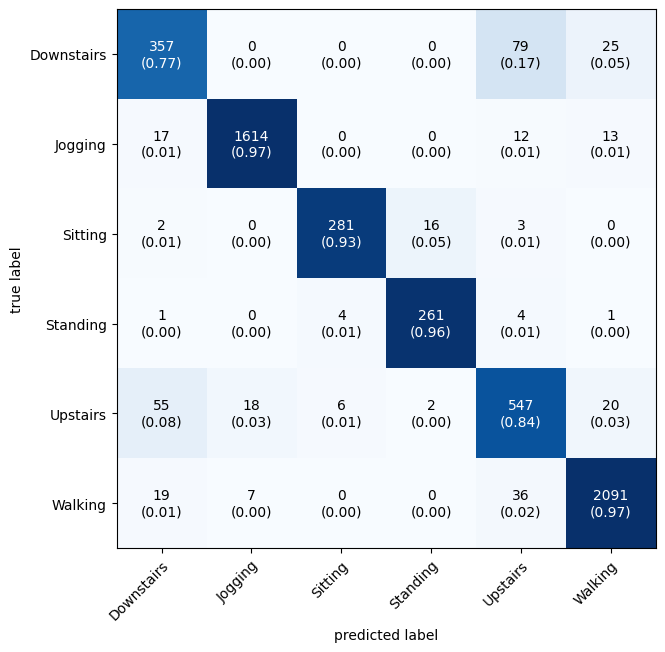

In [ ]:
mat=confusion_matrix(y_test,y_pred_1d)
plot_confusion_matrix(conf_mat=mat, class_names=label_encode.classes_, show_normed=True, figsize=(7,7))

In [ ]:
print(classification_report(y_test, y_pred_1d))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       461
           1       0.98      0.97      0.98      1656
           2       0.97      0.93      0.95       302
           3       0.94      0.96      0.95       271
           4       0.80      0.84      0.82       648
           5       0.97      0.97      0.97      2153

    accuracy                           0.94      5491
   macro avg       0.91      0.91      0.91      5491
weighted avg       0.94      0.94      0.94      5491



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

# Add an LSTM layer with 64 units and input shape (80, 4) for 80 time steps and 4 features
model.add(LSTM(64, input_shape=(80, 4), activation='relu', return_sequences=True))
model.add(Dropout(0.1))

# Add another LSTM layer with 128 units
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))

# Flatten the output
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.3))

# Output layer with 6 units (assuming 6 classes for classification) and softmax activation
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


In [ ]:
history = model.fit(X_train_1d, y_train, batch_size=50, epochs=20, validation_data=(X_test_1d, y_test), verbose=1)
